In [1]:
import numpy as np
import pandas as pd
import sys,os
import glob
import scipy.optimize as spo
sys.path.append(sys.path[0] + '/..')

import matplotlib.pyplot as plt
import matplotlib

from imp import reload
import platereaderclass as prc; reload(prc);
import plates_EstimateMSP as eMSP; reload(eMSP);


In [2]:
# general plot options

axes_fontsize    = 15  # size of numbers on axes
label_fontsize   = 15  # size of labels for axes
legend_fontsize  = 12
panelID_fontsize = 20  # size of panel indicator (A, B, C, ...)
plot_xfigsize    = 15



In [3]:
basedir = '/home/lukas/projects/antibiotics/experiments/200129_AllData/'

design_assignment_andy = {  'andy_WT.xlsx':         [0, 1, 2], 
                            'andy_TEM1.xlsx':       [0, 0, 1, 1, 2, 2], 
                            'andy_E104KG238S.xlsx': [0, 0, 1, 1, 2, 2],
                            'andy_G238S.xlsx':      [0, 0, 1, 1, 2, 2],
                            'andy_Triple.xlsx':     [0, 1, 2]}

design_assignment_philip = {'philip_G238S.xlsx':    [0, 0, 0, 0, 0, 0, 0, 0],
                            'philip_Triple.xlsx':   [0, 0, 1, 1, 1, 1, 0, 0]}

design_assignment      = {  'andy_WT.xlsx':         [0, 1, 2], 
                            'andy_TEM1.xlsx':       [0, 0, 1, 1, 2, 2], 
                            'andy_E104KG238S.xlsx': [0, 0, 1, 1, 2, 2],
                            'andy_G238S.xlsx':      [0, 0, 1, 1, 2, 2],
                            'andy_Triple.xlsx':     [0, 1, 2],
                            'philip_G238S.xlsx':    [0, 0, 0, 0, 0, 0, 0, 0],
                            'philip_Triple.xlsx':   [0, 0, 1, 1, 1, 1, 0, 0]}


def make_argparse_options(filename,design_assignment):
    return ['-q','-i',basedir + filename.split('_')[0] + '/data/' + filename,'-M','NfuncB','BfuncN', '-D'] + [str(i) for i in design_assignment]

def AddDF(df1 = None,df2 = None):
    if df1 is None:    return df2
    elif df2 is None:  return df1
    else:              return pd.concat([df1,df2],ignore_index = True)

def split_allele_name_andy(df):
    def split_iptg(allele):
        if allele[-4:].upper() == 'IPTG': return [allele[:-5],allele[-5:]]
        else:                             return [allele,'+IPTG']
    data = [x.strip('andy') for x in df['Title'].values]
    data = np.array([['andy',split_iptg(x.split('_')[0])[0],split_iptg(x.split('_')[0])[1],x.split('_')[1]] for x in data])
    df['exp'] = 'andy'
    df['Allele'] = data[:,1]
    df['ExprLevel'] = data[:,2]
    df['Repetition'] = data[:,3]
    return df

def split_allele_name_philip(df):
    data = np.array([x.split('_') for x in df['Title'].values])
    df['exp'] = 'philip'
    df['Allele'] = data[:,0]
    df['ExprLevel'] = data[:,1]
    df['Repetition'] = data[:,2]
    return df



In [4]:
results_andy = None
for datafile in design_assignment_andy.keys():
    curres = eMSP.EstimateMSP(params = make_argparse_options(datafile,design_assignment_andy[datafile]))
    results_andy = AddDF(results_andy,curres)

results_philip = None
for datafile in design_assignment_philip.keys():
    curres = eMSP.EstimateMSP(params = make_argparse_options(datafile,design_assignment_philip[datafile]))
    results_philip = AddDF(results_philip,curres)
    
results = AddDF(split_allele_name_andy(results_andy),split_allele_name_philip(results_philip))

results

,Title,Filename,NB_sMIC,NB_sMIC_stddev,NB_tau,NB_tau_stddev,NB_R2,BN_sMIC,BN_sMIC_stddev,BN_tau,BN_tau_stddev,BN_R2,exp,Allele,ExprLevel,Repetition
0,andyWT_A,/home/lukas/projects/antibiotics/experiments/2...,0.057485,0.107967,1.721031e-07,1.509565e-07,0.565178,0.103859,0.133159,9.726884e-08,8.531728e-08,0.565178,andy,WT,+IPTG,A
1,andyWT_B,/home/lukas/projects/antibiotics/experiments/2...,0.043705,0.064954,2.603217e-07,1.708215e-07,0.699012,0.069469,0.080090,1.819680e-07,1.194063e-07,0.699012,andy,WT,+IPTG,B
2,andyWT_C,/home/lukas/projects/antibiotics/experiments/2...,0.056324,0.078849,1.883684e-07,1.311983e-07,0.673351,0.084102,0.090536,1.268380e-07,8.834245e-08,0.673351,andy,WT,+IPTG,C
3,TEM1-IPTG_A,/home/lukas/projects/antibiotics/experiments/2...,0.036567,0.023540,3.080493e-07,4.632864e-07,0.306577,0.044654,0.013181,9.444087e-08,1.420330e-07,0.306577,andy,TEM1,-IPTG,A
4,TEM1+IPTG_A,/home/lukas/projects/antibiotics/experiments/2...,0.034087,0.017761,2.486184e-07,3.243498e-07,0.370096,0.040912,0.010604,9.201257e-08,1.200404e-07,0.370096,andy,TEM1,+IPTG,A
5,TEM1-IPTG_B,/home/lukas/projects/antibiotics/experiments/2...,0.035006,0.043180,2.844460e-07,1.521564e-07,0.777520,0.050296,0.051579,2.211624e-07,1.183046e-07,0.777520,andy,TEM1,-IPTG,B
6,TEM1+IPTG_B,/home/lukas/projects/antibiotics/experiments/2...,0.037940,0.043730,2.827461e-07,1.435045e-07,0.795168,0.052398,0.051129,2.248307e-07,1.141103e-07,0.795168,andy,TEM1,+IPTG,B
7,TEM1-IPTG_C,/home/lukas/projects/antibiotics/experiments/2...,0.026702,0.024979,3.410337e-07,1.948223e-07,0.753949,0.035003,0.026807,2.571221e-07,1.468861e-07,0.753949,andy,TEM1,-IPTG,C
8,TEM1+IPTG_C,/home/lukas/projects/antibiotics/experiments/2...,0.036541,0.029496,3.137430e-07,1.347172e-07,0.844328,0.044504,0.031822,2.649021e-07,1.137456e-07,0.844328,andy,TEM1,+IPTG,C
9,E104KG238S-IPTG_A,/home/lukas/projects/antibiotics/experiments/2...,0.516232,0.369723,1.047349e-06,4.655603e-07,0.835009,0.621101,0.389914,8.745455e-07,3.887470e-07,0.835009,andy,E104KG238S,-IPTG,A


In [5]:
def grid2design(gridcoordinates, plate_size, griddesign = (12.,8.)):
    if isinstance(gridcoordinates[0],(list,tuple,np.ndarray)):
        return np.array([grid2design(gc,plate_size, griddesign) for gc in gridcoordinates])
    else:
        return np.array([ 
                plate_size['Bmin'] * np.power(plate_size['Bmax']/plate_size['Bmin'],gc[0]/(griddesign[0]-1.)),
                plate_size['Nmin'] * np.power(plate_size['Nmax']/plate_size['Nmin'],1. - gc[1]/(griddesign[1]-1.))
            ])


def design2grid(designcoordinates, plate_size, griddesign = (12.,8.)):
    return np.array([[
        (griddesign[0]-1) * (np.log(dc[0]/plate_size['Bmin']))/np.log(plate_size['Bmax']/plate_size['Bmin']),
        (griddesign[1]-1) * (1 - (np.log(dc[1]/plate_size['Nmin']))/np.log(plate_size['Nmax']/plate_size['Nmin']))
    ] for dc in designcoordinates])
    

def adjust_ax(ax, plate_size, fc = '#d3d7cf'):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
    xticks = [1e-2,1e-1,1e0,1e1]
    yticks = [1e3,1e5,1e7]
    
    xtickpos = design2grid(np.array([xticks,np.ones_like(xticks)]).T, plate_size = plate_size)[:,0]
    ytickpos = design2grid(np.array([np.ones_like(yticks),yticks]).T, plate_size = plate_size)[:,1]

    ax.set_xticks(xtickpos)
    ax.set_xticklabels([r'$10^{{{:d}}}$'.format(int(np.log10(x))) for x in xticks], fontsize = axes_fontsize)
    ax.set_yticks(ytickpos)
    ax.set_yticklabels([r'$10^{{{:d}}}$'.format(int(np.log10(y))) for y in yticks], fontsize = axes_fontsize)

    ax.set_xlim([-.6,11.6])
    ax.set_ylim([7.6,-.6])
    
    background = matplotlib.patches.Rectangle([ax.get_xlim()[0],ax.get_ylim()[0]],np.diff(ax.get_xlim()),np.diff(ax.get_ylim()), fc = fc, zorder = -1)
    ax.add_patch(background)

    ax.set_xlabel(r'Initial Antibiotic Concentration $B_0$ $[\mu g/ml]$', fontsize = label_fontsize)
    ax.set_ylabel(r'Inoculum size $N_0$', fontsize = label_fontsize)
    
    
def patch_color(value, color1 = [ 65,101,164], color2 = [255,255,255], hexoutput = True):
    value = np.max([0,np.min([1,value])])
    if hexoutput:
        return '#{:02X}{:02X}{:02X}'.format(int(color1[0] * value + color2[0] * (1-value)),int(color1[1] * value + color2[1] * (1-value)),int(color1[2] * value + color2[2] * (1-value)))
    else:
        return [int(color1[0] * value + color2[0] * (1-value)),int(color1[1] * value + color2[1] * (1-value)),int(color1[2] * value + color2[2] * (1-value))]

def plot_well(ax, pos, value, thres, plate_pos, plate_data_shape, radius = 0.4):
    border_color = '#2e3436'
    if value <= thres:
        border_color = '#a40000'
    circle = matplotlib.patches.Circle(pos,radius,facecolor = patch_color(value), edgecolor = border_color, linewidth = 3)
    ax.add_patch(circle)

    
def rescale(platedata, threshold):
    return (platedata - np.min(platedata))/(np.max(platedata) - np.min(platedata)),(threshold - np.min(platedata))/(np.max(platedata)-np.min(platedata))


def BfuncN(N, tau, smic): return smic*np.exp((N-1)/tau)
def NfuncB(B, tau, smic): return 1 + tau * np.log(B/smic)



In [6]:
all_raw_data_files = list(glob.glob(basedir + '/*/data/*.xlsx'))
all_design_assignments = [np.array(design_assignment[os.path.split(filename)[1]]) for filename in all_raw_data_files]
for i in range(1,len(all_design_assignments)):
    all_design_assignments[i] += np.max(all_design_assignments[i-1]) + 1
all_design_assignments = np.concatenate(all_design_assignments)


all_platedata = prc.PlateReaderData(infiles = all_raw_data_files, DesignAssignment = all_design_assignments)
threshold     = all_platedata.EstimateGrowthThreshold()

In [7]:
def PlotPlates(ax, platedata, design, threshold, msp_parameters):
    platesize = {'Bmin':design[0][0,0],
                 'Bmax':design[0][-1,-1],
                 'Nmin':np.min(design[1]),
                 'Nmax':np.max(design[1])}
    
    for x in range(platedata.shape[0]):
        for y in range(platedata.shape[1]):
            plot_well(ax, [x,y], platedata[x,y], threshold, platesize, platedata.shape)

    nlist = np.exp(np.linspace(np.log(platesize['Nmin']/10),np.log(platesize['Nmax']*10),50))
    for msp_parameter in msp_parameters:
        blist    = BfuncN(nlist, 1./msp_parameter['NB_tau'], msp_parameter['NB_sMIC'])
        mspcurve = design2grid(np.array([blist,nlist]).T, platesize)
        ax.plot(mspcurve[:,0],mspcurve[:,1], lw = msp_parameter['lw'], c = msp_parameter['color'], zorder = 100)
    
    adjust_ax(ax, platesize)


/home/lukas/projects/antibiotics/experiments/200129_AllData/andy/data/andy_E104KG238S.xlsx


/usr/lib64/python3.9/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/lib64/python3.9/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<ipython-input-5-5f4feccb7d40>:13: RuntimeWarning: invalid value encountered in log
  (griddesign[0]-1) * (np.log(dc[0]/plate_size['Bmin']))/np.log(plate_size['Bmax']/plate_size['Bmin']),
/usr/lib64/python3.9/site-packages/numpy/core/_asarray.py:

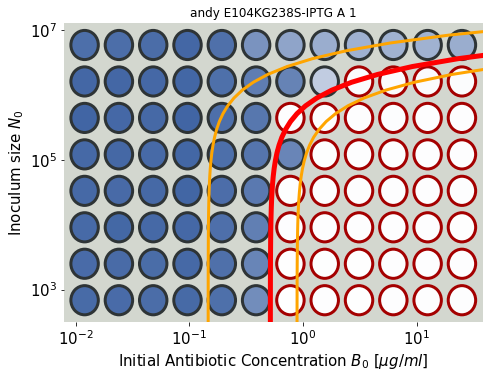

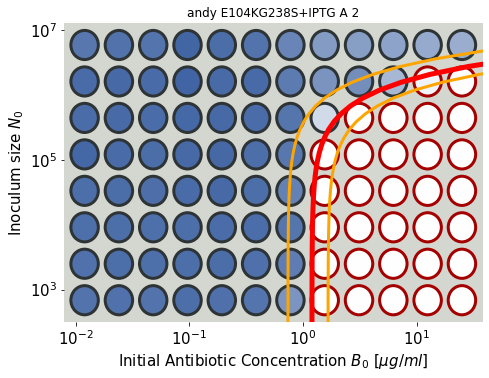

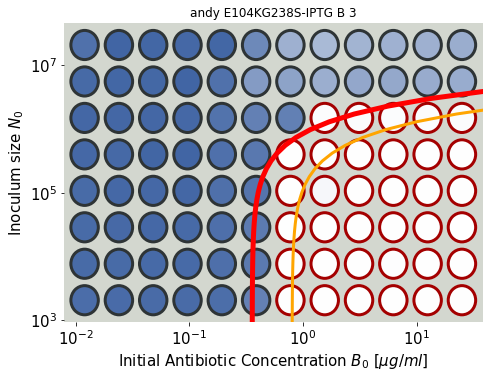

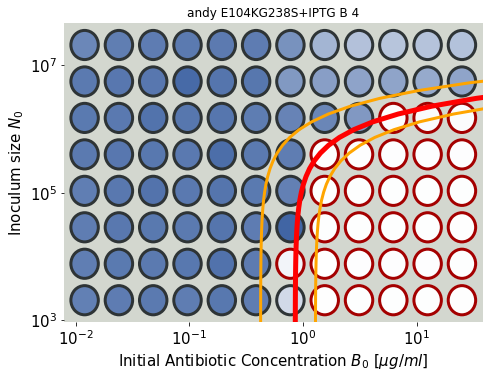

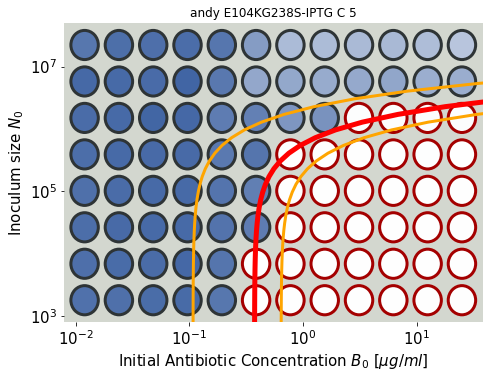

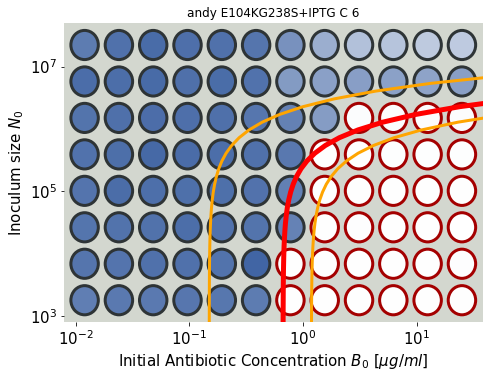

In [10]:
for filename in all_raw_data_files:
    print(filename)
    xlsx = os.path.split(filename)[1]
    plates = prc.PlateReaderData(infiles = [filename], DesignAssignment = design_assignment[xlsx])
    for i,(fn,title,platedata,da) in enumerate(plates):
        mspfitresults = results[results['Title']==title.replace(' ','_')]
        mspparameters = [{'NB_tau':mspfitresults['NB_tau'].values[0] + a * mspfitresults['NB_tau_stddev'].values[0],
                          'NB_sMIC':mspfitresults['NB_sMIC'].values[0] + a * mspfitresults['NB_sMIC_stddev'].values[0],
                         'lw':5-2*a*a,
                         'color':'red' if a==0 else 'orange'} for a in [-1,0,1]]
        fig,ax = plt.subplots(1,1,figsize = (plot_xfigsize/2,5.5))
        platedata, thr = rescale(platedata.T, threshold)
        PlotPlates(ax, platedata, plates.get_design(da), thr, mspparameters)
        ax.set_title('{} {} {}'.format(xlsx.split('_')[0],title,i+1))
        fig.savefig('plates_{}_{}.png'.format(xlsx[:-5],i+1))
    
    # delete this break statement to run over all files
    # now it breaks after analyzing first file
    break